In [1]:
import os
#os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/Merians_db/tangos_data1.db'
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data/MerianSIDM/MerianSIDM.db'
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/bk639/MerianSIDM/'
#load tangos database

#make sure to only load tangos after setting environment variable otherwise it will see nothing
import tangos
import pynbody
#export TANGOS_DB_CONNECTION=/home/bk639/Merians_db/tangos_data.db
# set the environment variable

sims = tangos.all_simulations()
print(sims)

[<Simulation("r431.romulus25.3072g1HsbBH")>, <Simulation("r431.romulus25cvdXsec.3072g1HsbBH")>, <Simulation("r468.romulus25.3072g1HsbBH")>, <Simulation("r468.romulus25si2s50v35")>, <Simulation("r488.romulus25.3072g1HsbBH")>, <Simulation("r488.romulus25si2s50v35")>, <Simulation("r492.romulus25.3072g1HsbBH")>, <Simulation("r492.romulus25cvdXsec.3072g1HsbBH")>, <Simulation("r492.romulus25si2s50v35")>, <Simulation("r523.romulus25.3072g1HsbBH")>, <Simulation("r523.romulus25si2s50v35")>, <Simulation("r544.romulus25.3072g1HsbBH")>, <Simulation("r544.romulus25si2s50v35")>, <Simulation("r597.romulus25.3072g1HsbBH")>, <Simulation("r597.romulus25si2s50v35")>, <Simulation("r618.romulus25.3072g1HsbBH")>, <Simulation("r618.romulus25si2s50v35")>, <Simulation("r634.romulus25.3072g1HsbBH")>, <Simulation("r634.romulus25si2s50v35")>]


In [ ]:
# import tangos.relation_finding.tree.MergerTree
from tangos.relation_finding.tree import MergerTree
import matplotlib.pyplot as plt
import numpy as np
import tangos # Adjust this import as needed

def plot_limited_merger_trees(sims,max_redshifts=13, size_scale=1, figsize=(8, 8)):
    
    #only plot sims with the following basenames
    #basenames = ['r613.romulus25.3072g1HsbBH', 'r615.romulus25.3072g1HsbBH', 'r761.romulus25.3072g1HsbBH','r918.romulus25.3072g1HsbBH']
    #sims = [tangos.get_simulation(basename) for basename in basenames]
    #sims = tangos.all_simulations()
    
    #sims = sims[]
    n = len(sims)
    fontsize = 20
    
    # Calculate the number of rows and columns
    n_cols = min(n, 8)  # Limit to 5 columns max
    n_rows = int(np.ceil(n / n_cols))
    
    # Create figure and axes
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, squeeze=False)
    axs = axs.flatten()
    redshifts = sims[0].timesteps[0].redshift_cascade[::-1][:max_redshifts]
    redshifts = [round(z, 2) for z in redshifts]
    yticks = np.arange(0, 5 * max_redshifts, 5)

    for i, sim in enumerate(sims):
        ax = axs[i]
        ax.set_aspect('equal')
        #if sim = r1023 use halo 2
        #for sim r707 use halo 2    
        # for sim r968 use halo 3
        if sim.basename == 'r1023.romulus25.3072g1HsbBH':
            halo = sim.timesteps[-1].halos[2]
        elif sim.basename == 'r707.romulus25.3072g1HsbBH':
            halo = sim.timesteps[-1].halos[2]
        elif sim.basename == 'r968.romulus25.3072g1HsbBH':
            halo = sim.timesteps[-1].halos[3]
        else:            
            halo = sim.timesteps[-1].halos[1]
        tree = MergerTree(halo)
        tree.construct()

        def plot_tree_limited(node, depth=0):
            if depth >= max_redshifts:
                return

            y = depth * tree.x_step
            x = node['_x']
            scaled_size = node['size'] * size_scale

            circ = plt.Circle((x, y), scaled_size, facecolor='black', edgecolor='none')
            ax.add_patch(circ)
            
            for child_node in node['contents']:
                child_depth = depth + 1
                if child_depth < max_redshifts:
                    ax.plot([x, child_node['_x']], [y, y + tree.x_step], 'k', linewidth=0.5)
                plot_tree_limited(child_node, child_depth)

        plot_tree_limited(tree._treedata)
        
        ax.set_ylim(-5, tree.x_step * max_redshifts)
        #get current xlim, and make sure the minimum xrange is greater than 5
        xlim = ax.get_xlim()
        if xlim[1] - xlim[0] < 5:
            ax.set_xlim(xlim[0] - 2.5, xlim[1] + 2.5)

        #add vertical lines at redshifts
        for z in range(1, max_redshifts):
            ax.axhline(z * tree.x_step, color='gray', linestyle='--', linewidth=0.5,alpha=0.5)
        #remove plot borders
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticks([])
        

        ax.set_yticks(yticks)
        ax.set_yticklabels(redshifts, fontsize=fontsize)
        ax.set_xticks([])
        name = sim.basename.split('.')[0]
        
        ax.set_title(f'Sim {name}', fontsize=fontsize)
        
        if i % n_cols == 0:  # Only for leftmost plots
            ax.set_ylabel('Redshift', fontsize=fontsize)

    # Remove any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.savefig('merger_trees.png', dpi=150, bbox_inches='tight')
    plt.show()

# Usage
plot_limited_merger_trees()

2024-10-30 21:20:57,277 : Tree build complete; total time 0.17s
2024-10-30 21:20:57,278 :   Progenitor query took 0.16s
2024-10-30 21:20:57,279 :   Property query took 0.00s
2024-10-30 21:20:57,279 :   Tree post-processing took 0.01s


Plotting r431...


2024-10-30 21:20:57,648 : Tree build complete; total time 0.20s
2024-10-30 21:20:57,649 :   Progenitor query took 0.17s
2024-10-30 21:20:57,650 :   Property query took 0.01s
2024-10-30 21:20:57,651 :   Tree post-processing took 0.02s


Plotting r468...


2024-10-30 21:21:00,713 : Tree build complete; total time 1.04s
2024-10-30 21:21:00,714 :   Progenitor query took 0.98s
2024-10-30 21:21:00,715 :   Property query took 0.02s
2024-10-30 21:21:00,716 :   Tree post-processing took 0.04s
2024-10-30 21:21:01,248 : Tree build complete; total time 0.44s
2024-10-30 21:21:01,250 :   Progenitor query took 0.42s
2024-10-30 21:21:01,251 :   Property query took 0.00s
2024-10-30 21:21:01,251 :   Tree post-processing took 0.02s


Plotting r488...


2024-10-30 21:21:03,761 : Tree build complete; total time 0.72s
2024-10-30 21:21:03,762 :   Progenitor query took 0.67s
2024-10-30 21:21:03,764 :   Property query took 0.01s
2024-10-30 21:21:03,765 :   Tree post-processing took 0.04s
2024-10-30 21:21:04,490 : Tree build complete; total time 0.32s
2024-10-30 21:21:04,491 :   Progenitor query took 0.31s
2024-10-30 21:21:04,492 :   Property query took 0.00s
2024-10-30 21:21:04,493 :   Tree post-processing took 0.02s


Plotting r492...


2024-10-30 21:21:07,894 : Tree build complete; total time 1.37s
2024-10-30 21:21:07,895 :   Progenitor query took 1.34s
2024-10-30 21:21:07,896 :   Property query took 0.01s
2024-10-30 21:21:07,897 :   Tree post-processing took 0.03s
2024-10-30 21:21:10,271 : Tree build complete; total time 1.90s
2024-10-30 21:21:10,273 :   Progenitor query took 1.86s
2024-10-30 21:21:10,274 :   Property query took 0.01s
2024-10-30 21:21:10,275 :   Tree post-processing took 0.04s


Plotting r523...


2024-10-30 21:21:15,172 : Tree build complete; total time 1.40s
2024-10-30 21:21:15,173 :   Progenitor query took 1.34s
2024-10-30 21:21:15,174 :   Property query took 0.02s
2024-10-30 21:21:15,175 :   Tree post-processing took 0.05s
2024-10-30 21:21:16,740 : Tree build complete; total time 0.56s
2024-10-30 21:21:16,741 :   Progenitor query took 0.52s
2024-10-30 21:21:16,742 :   Property query took 0.01s
2024-10-30 21:21:16,743 :   Tree post-processing took 0.04s


Plotting r544...


2024-10-30 21:21:21,058 : Tree build complete; total time 1.04s
2024-10-30 21:21:21,059 :   Progenitor query took 1.02s
2024-10-30 21:21:21,060 :   Property query took 0.00s
2024-10-30 21:21:21,061 :   Tree post-processing took 0.02s
2024-10-30 21:21:21,940 : Tree build complete; total time 0.62s
2024-10-30 21:21:21,941 :   Progenitor query took 0.60s
2024-10-30 21:21:21,941 :   Property query took 0.01s
2024-10-30 21:21:21,942 :   Tree post-processing took 0.02s


Plotting r597...


2024-10-30 21:21:23,853 : Tree build complete; total time 0.41s
2024-10-30 21:21:23,854 :   Progenitor query took 0.39s
2024-10-30 21:21:23,855 :   Property query took 0.00s
2024-10-30 21:21:23,856 :   Tree post-processing took 0.01s
2024-10-30 21:21:23,948 : Tree build complete; total time 0.03s
2024-10-30 21:21:23,949 :   Progenitor query took 0.02s
2024-10-30 21:21:23,950 :   Property query took 0.00s
2024-10-30 21:21:23,950 :   Tree post-processing took 0.01s


Plotting r618...


2024-10-30 21:21:25,294 : Tree build complete; total time 0.43s
2024-10-30 21:21:25,295 :   Progenitor query took 0.41s
2024-10-30 21:21:25,296 :   Property query took 0.00s
2024-10-30 21:21:25,297 :   Tree post-processing took 0.02s
2024-10-30 21:21:26,026 : Tree build complete; total time 0.47s
2024-10-30 21:21:26,027 :   Progenitor query took 0.44s
2024-10-30 21:21:26,028 :   Property query took 0.01s
2024-10-30 21:21:26,028 :   Tree post-processing took 0.02s


Plotting r634...


2024-10-30 21:21:28,043 : Tree build complete; total time 0.26s
2024-10-30 21:21:28,045 :   Progenitor query took 0.24s
2024-10-30 21:21:28,046 :   Property query took 0.01s
2024-10-30 21:21:28,047 :   Tree post-processing took 0.02s
2024-10-30 21:21:28,108 : Tree build complete; total time 0.02s
2024-10-30 21:21:28,109 :   Progenitor query took 0.01s
2024-10-30 21:21:28,110 :   Property query took 0.00s
2024-10-30 21:21:28,111 :   Tree post-processing took 0.01s


All plots completed!


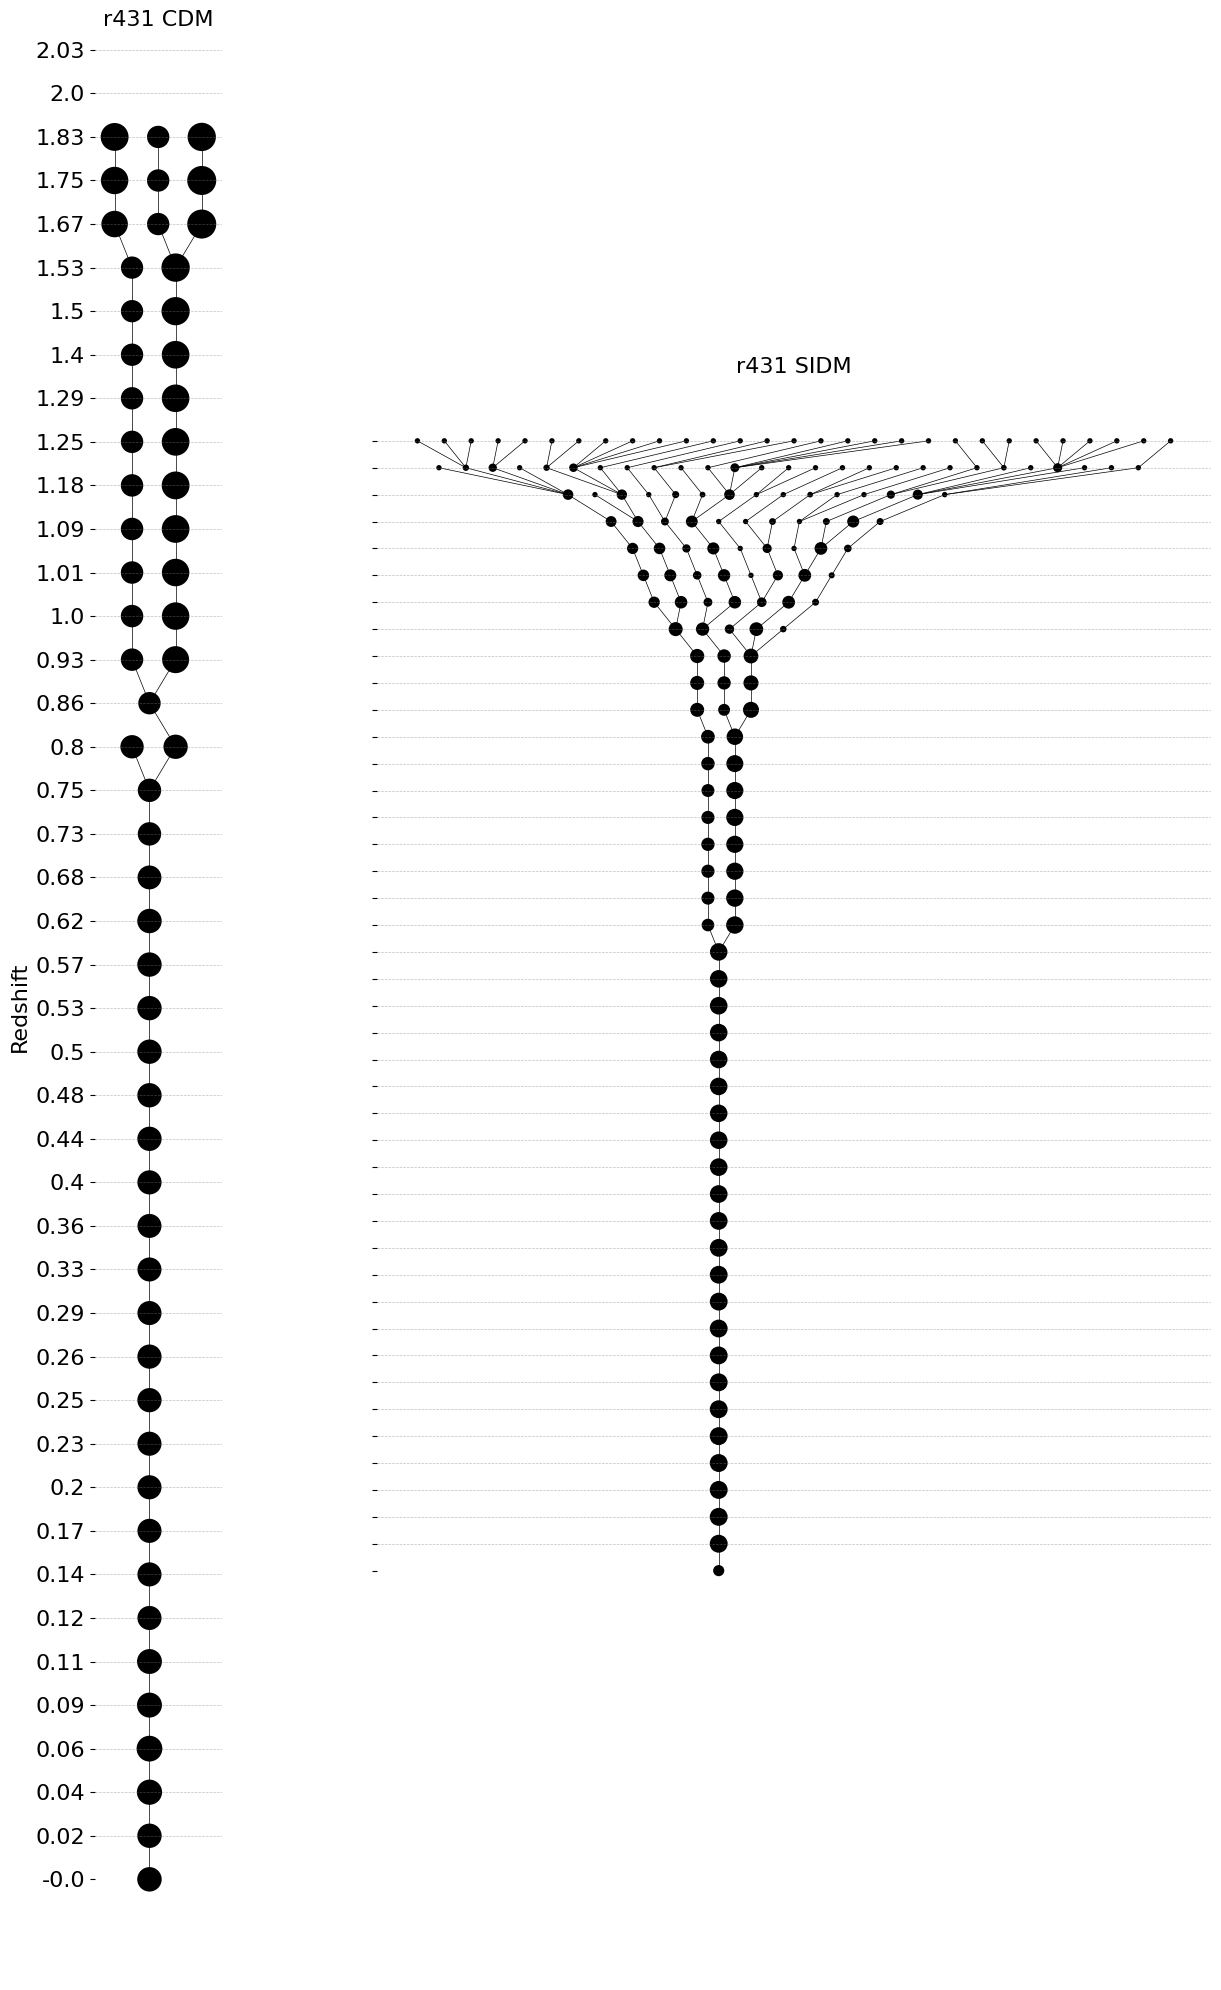

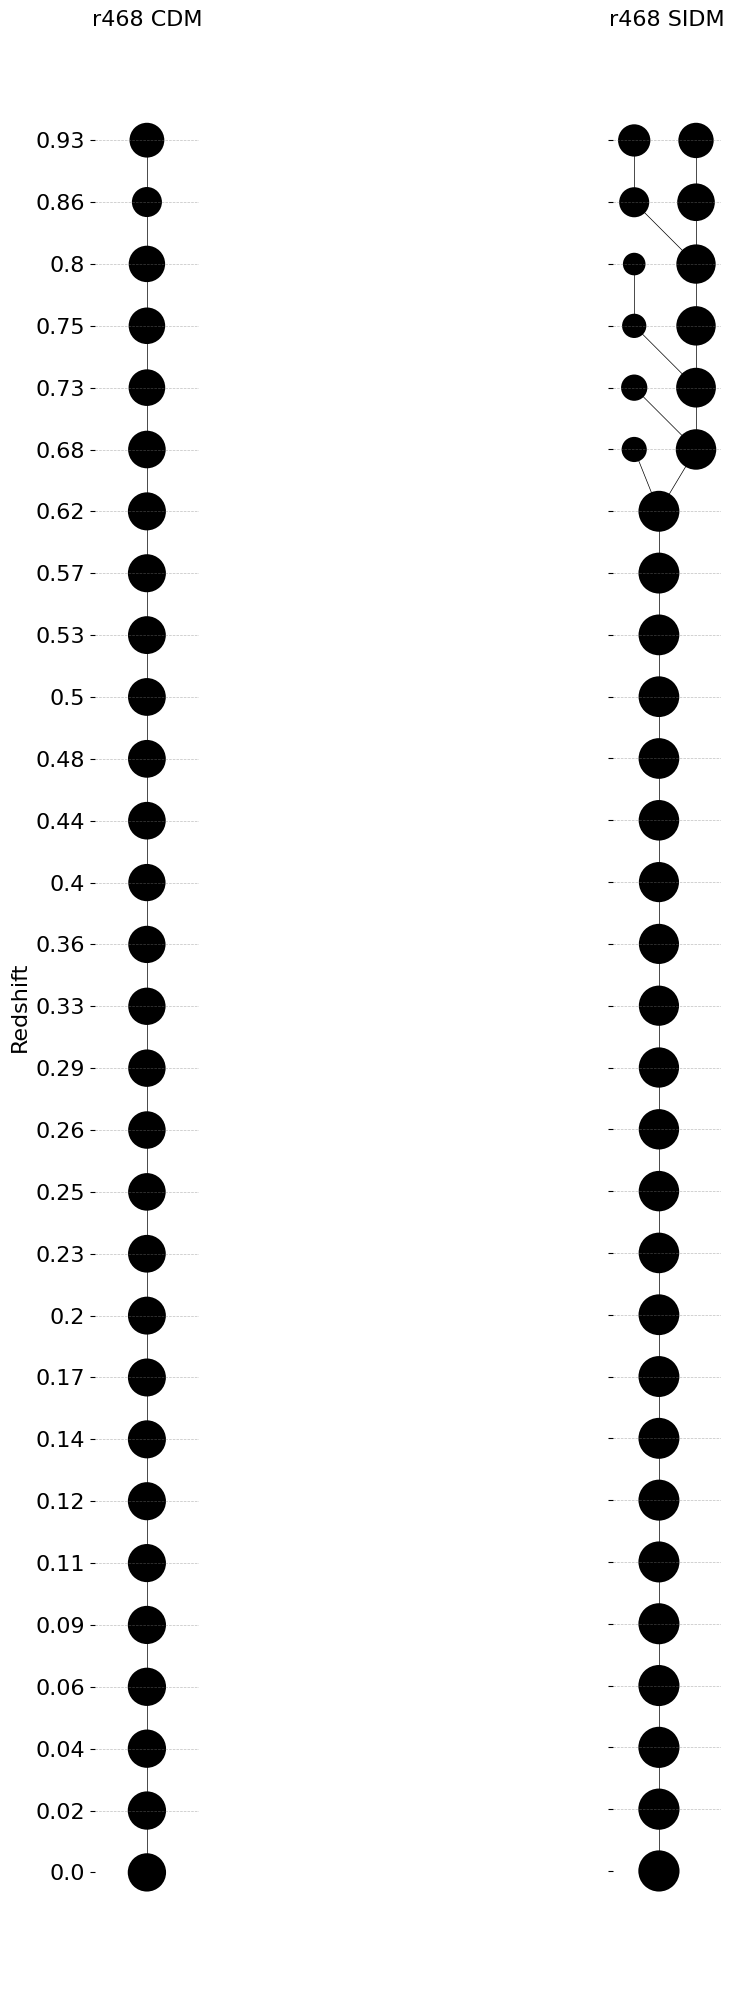

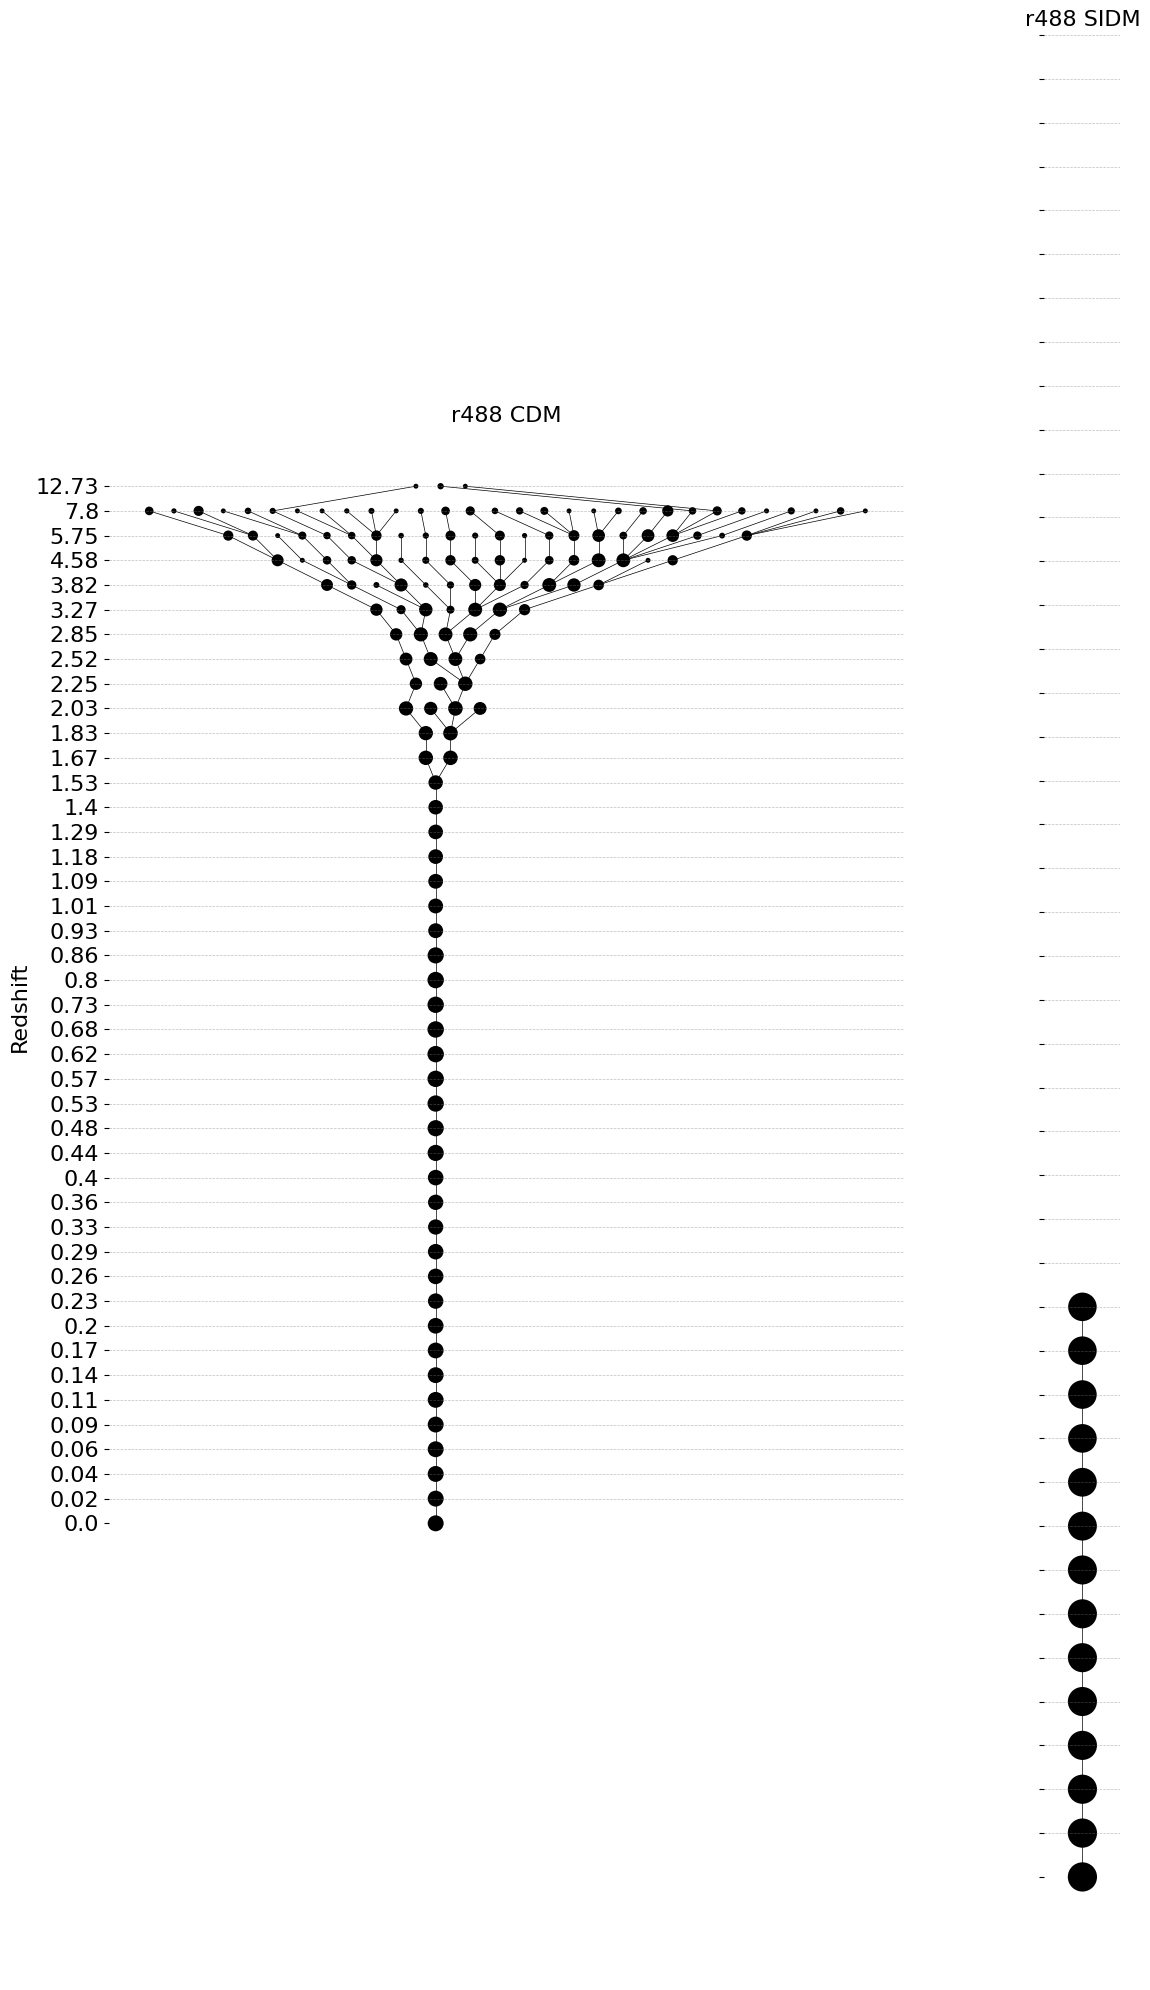

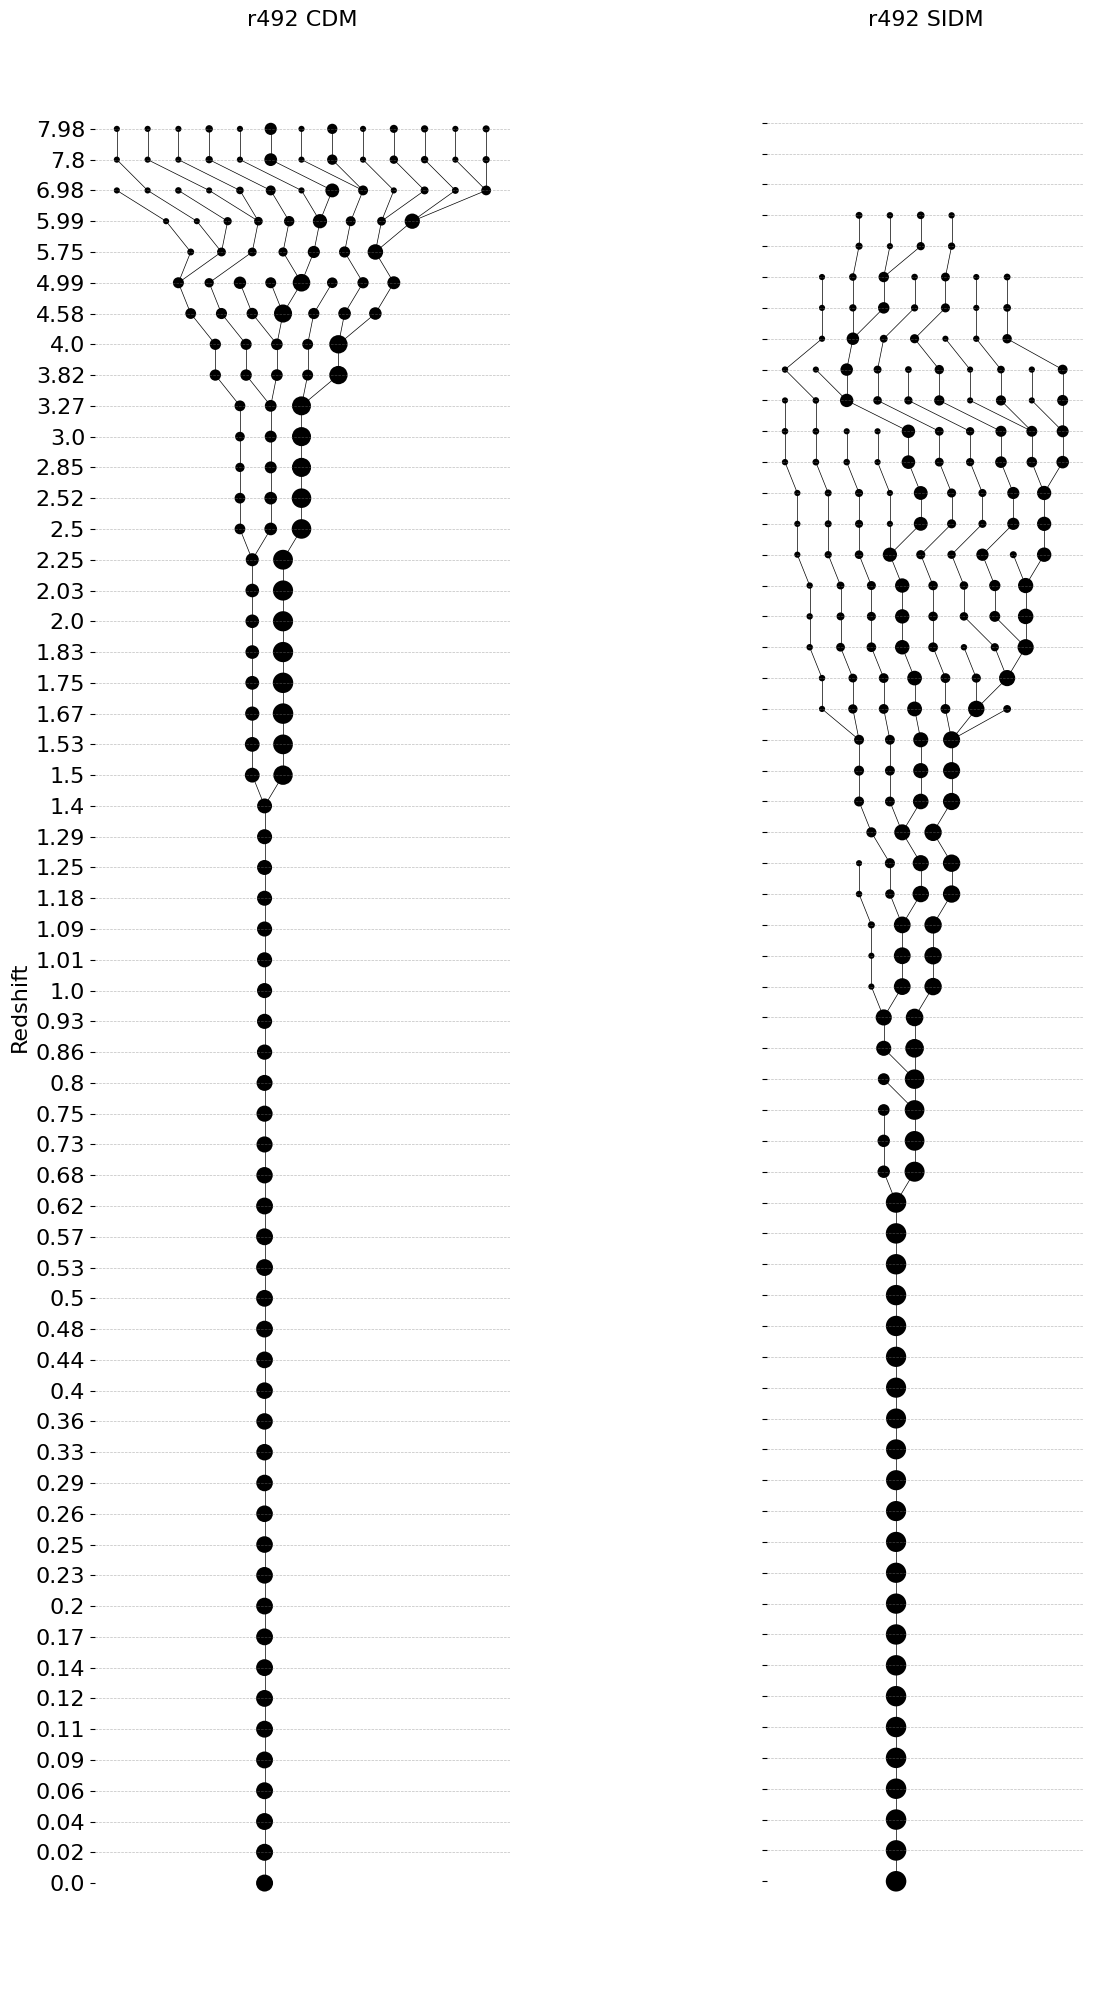

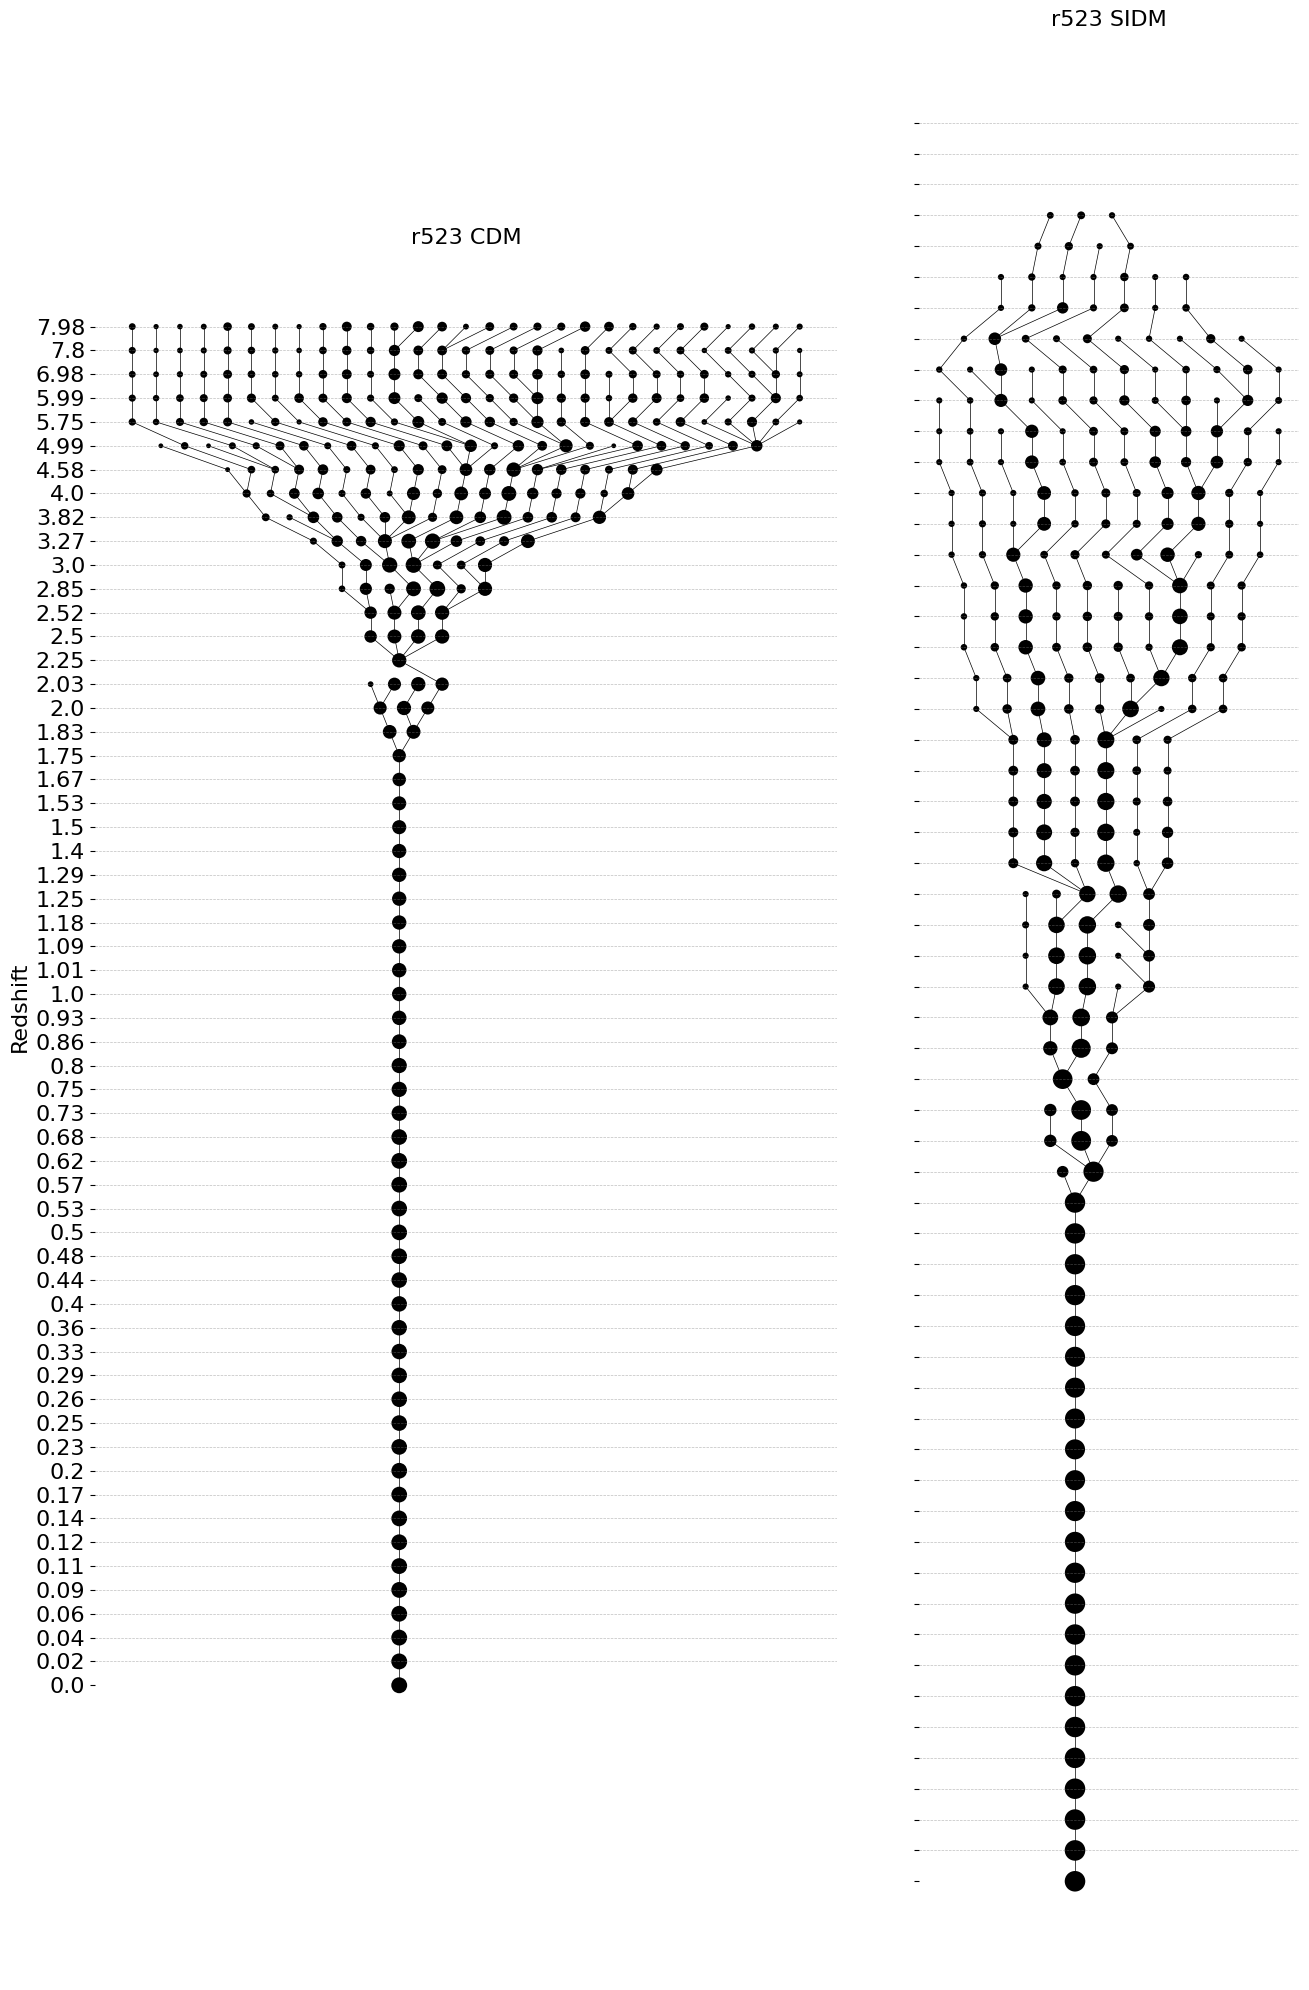

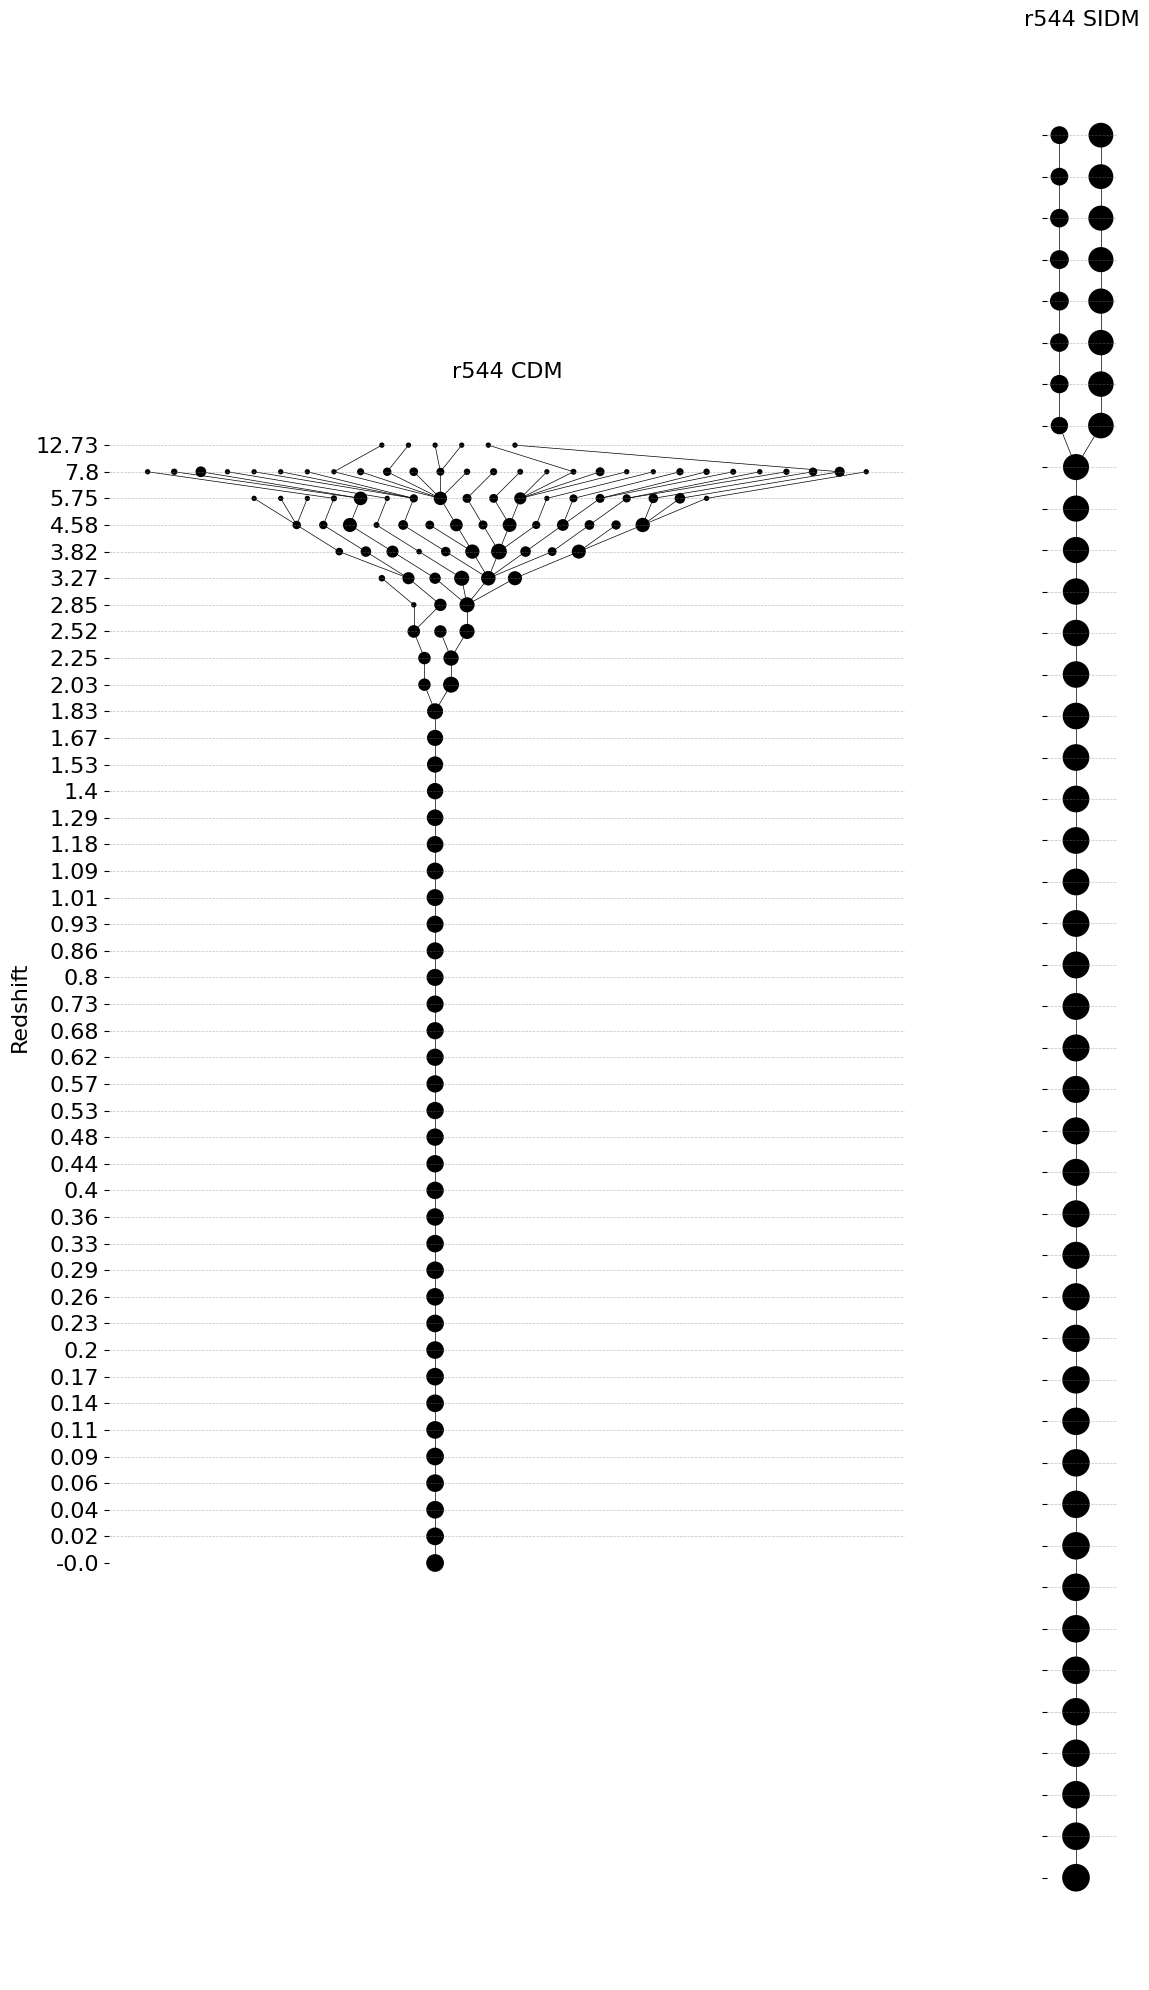

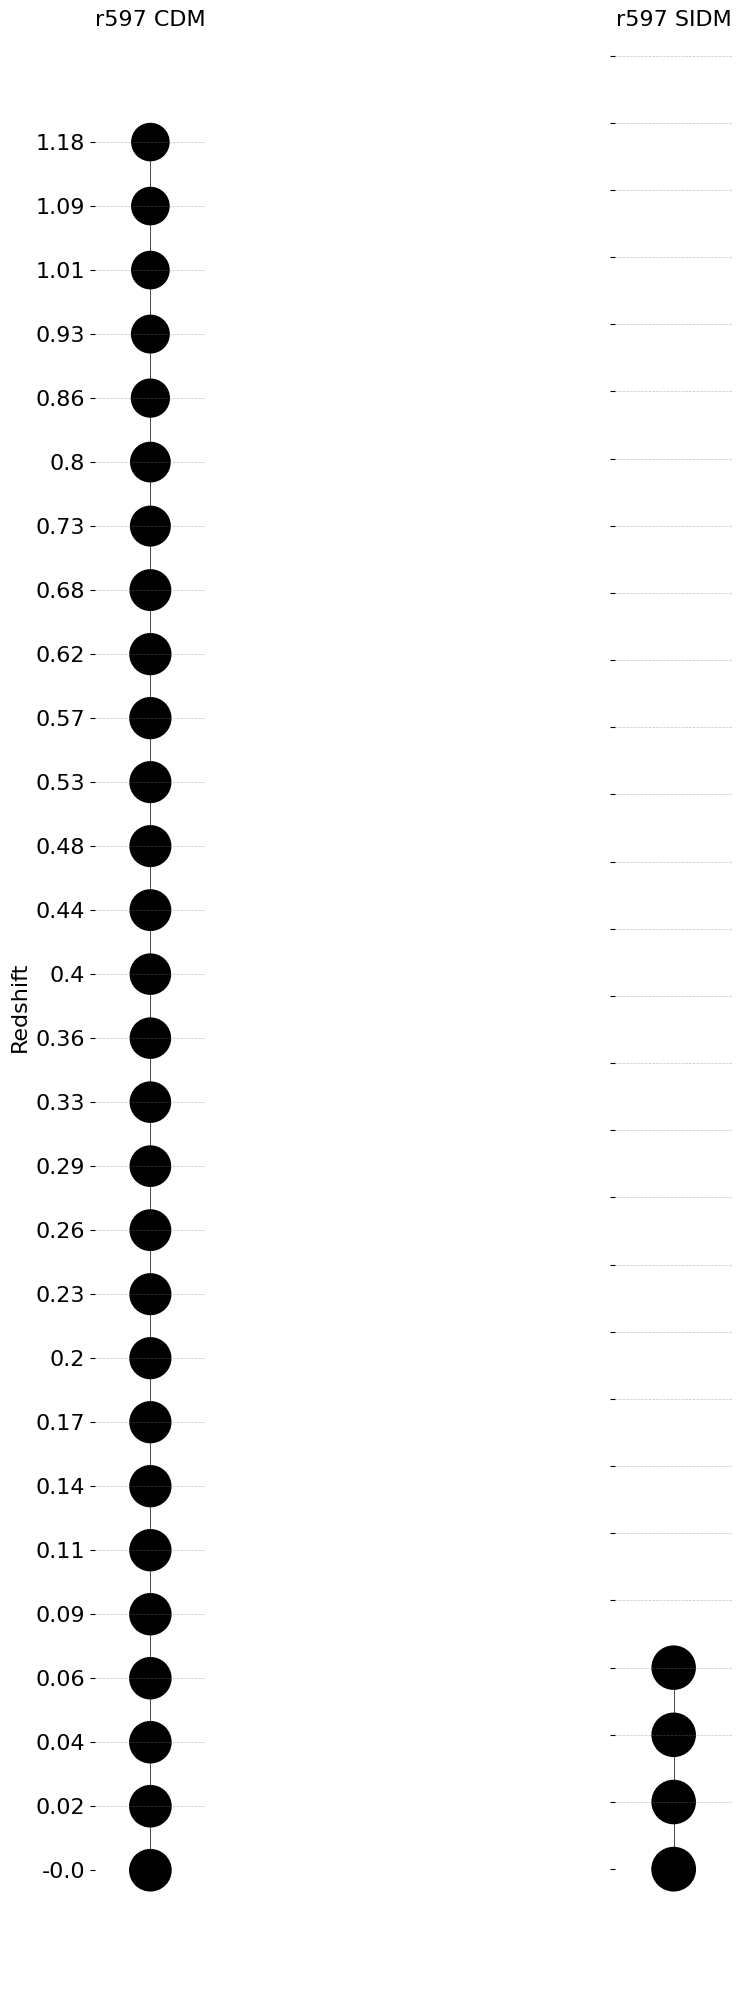

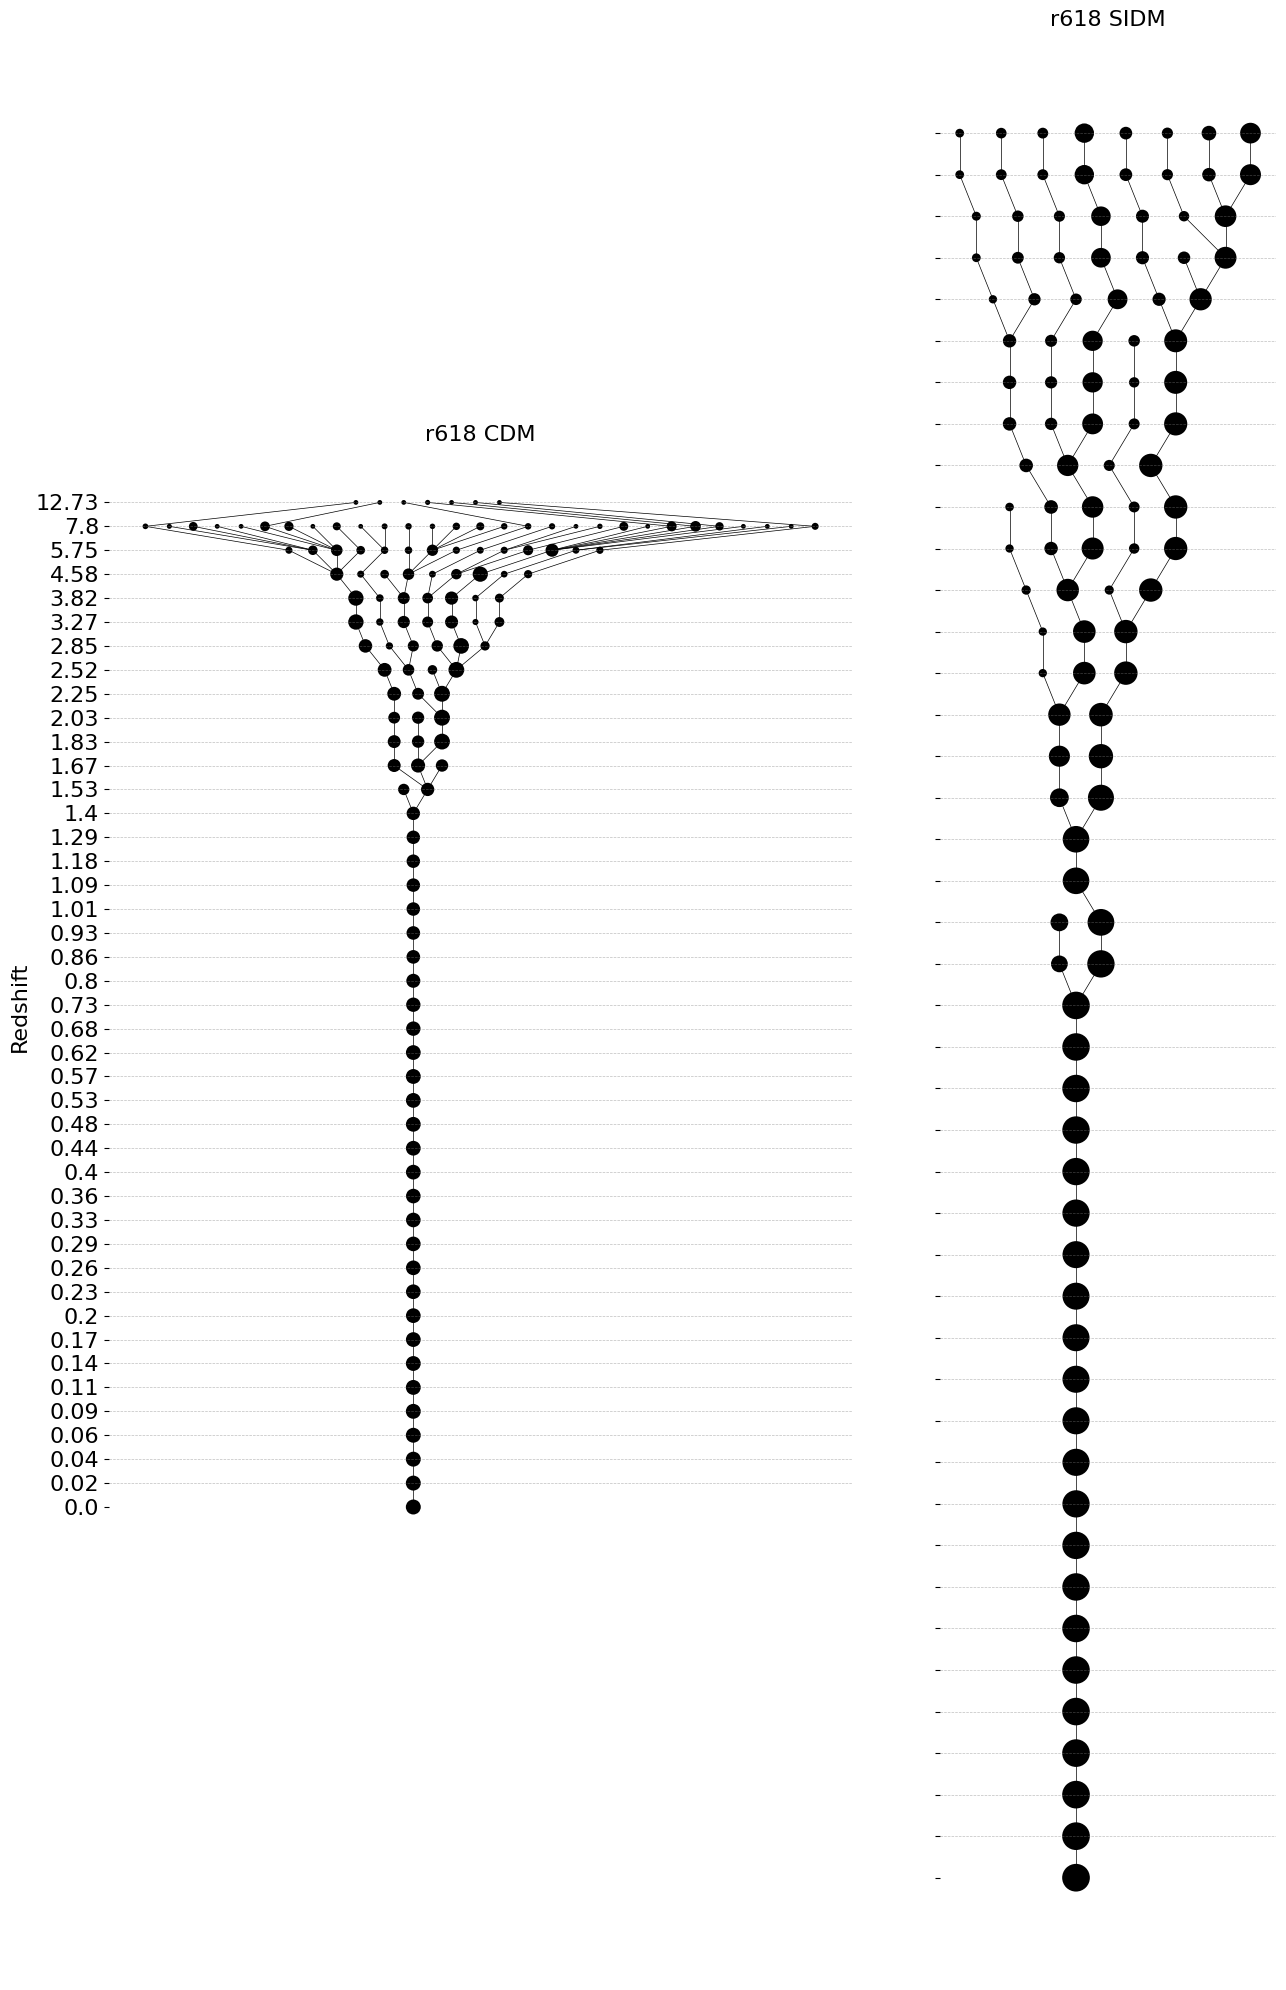

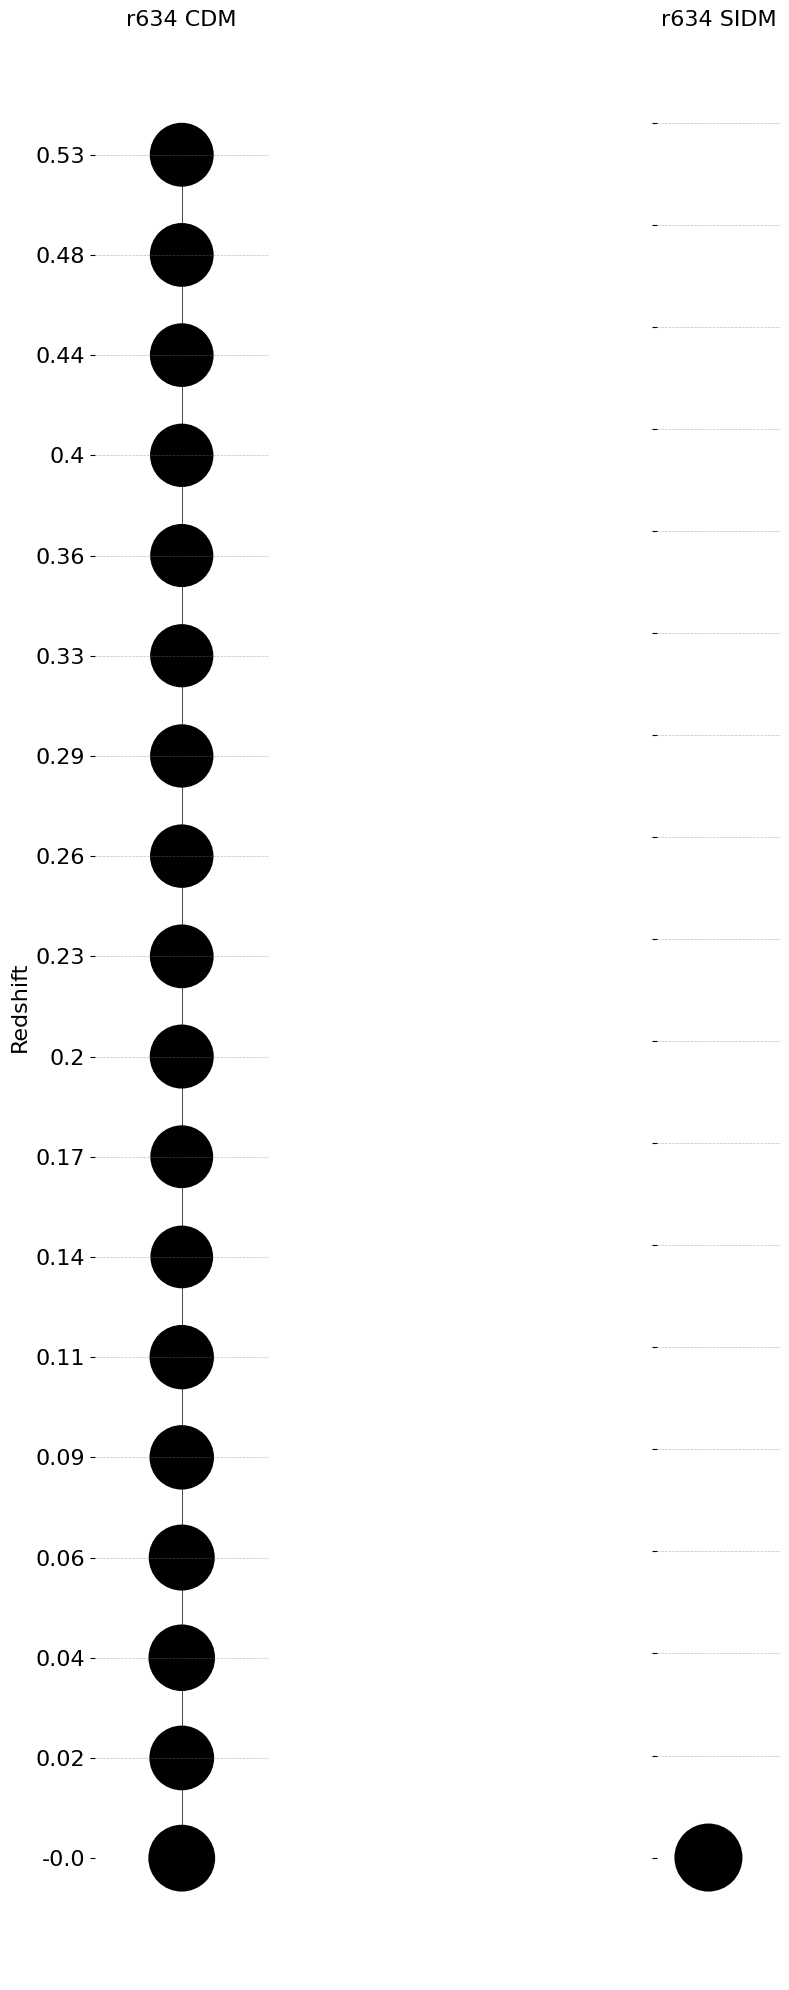

In [3]:
import os
import tangos
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from tangos.relation_finding.tree import MergerTree

def get_simulation_pairs(sims):
    """
    Group simulations into CDM-SIDM pairs based on their IDs.
    Returns a dictionary with simulation ID as key and tuple of (CDM, SIDM) sims as value.
    """
    pairs = {}
    
    # Group simulations by their ID number (e.g., r431, r468, etc.)
    for sim in sims:
        sim_id = sim.basename.split('.')[0]  # Get r431, r468, etc.
        
        if sim_id not in pairs:
            pairs[sim_id] = {'cdm': None, 'sidm': None}
            
        if 'si2s50v35' in sim.basename:
            pairs[sim_id]['sidm'] = sim
        if 'cvdXsec' in sim.basename:
            pairs[sim_id]['sidm'] = sim
        elif '.3072g1HsbBH' in sim.basename:
            pairs[sim_id]['cdm'] = sim
    
    # Filter out incomplete pairs
    return {k: v for k, v in pairs.items() if v['cdm'] and v['sidm']}

def plot_single_merger_tree_comparison(sim_id, pair, timesteps=13, size_scale=1, figsize=(10, 20)):
    """
    Plot merger tree comparison for a single CDM-SIDM pair.
    """
    fontsize = 16
    
    #get timesteps from the number of timesteps of both sims
    timesteps = min(len(pair['cdm'].timesteps), len(pair['sidm'].timesteps), timesteps)

    
    
    # Create figure with two subplots side by side
    fig, (ax_cdm, ax_sidm) = plt.subplots(1, 2, figsize=figsize)
    
    # Get redshifts for y-axis labels
    redshifts = pair['cdm'].timesteps[0].redshift_cascade[::-1][:timesteps]
    redshifts = [round(z, 2) for z in redshifts]
    yticks = np.arange(0, 5 * timesteps, 5)
    
    def plot_tree_limited(node, ax, tree, depth=0):
        if depth >= timesteps:
            return

        y = depth * tree.x_step
        x = node['_x']
        scaled_size = node['size'] * size_scale

        circ = plt.Circle((x, y), scaled_size, facecolor='black', edgecolor='none')
        ax.add_patch(circ)
        
        for child_node in node['contents']:
            child_depth = depth + 1
            if child_depth < timesteps:
                ax.plot([x, child_node['_x']], [y, y + tree.x_step], 'k', linewidth=0.5)
            plot_tree_limited(child_node, ax, tree, child_depth)
    
    # Plot CDM
    halo_cdm = pair['cdm'].timesteps[-1].halos[1]  # Main halo
    tree_cdm = MergerTree(halo_cdm)
    tree_cdm.construct()
    
    plot_tree_limited(tree_cdm._treedata, ax_cdm, tree_cdm)
    ax_cdm.set_title(f'{sim_id} CDM', fontsize=fontsize)
    
    # Plot SIDM
    halo_sidm = pair['sidm'].timesteps[-1].halos[1]  # Main halo
    tree_sidm = MergerTree(halo_sidm)
    tree_sidm.construct()
    
    plot_tree_limited(tree_sidm._treedata, ax_sidm, tree_sidm)
    ax_sidm.set_title(f'{sim_id} SIDM', fontsize=fontsize)
    
    # Format both plots
    for ax in [ax_cdm, ax_sidm]:
        ax.set_aspect('equal')
        #ax.set_ylim(-5, tree_cdm.x_step * max_redshifts)
        
        xlim = ax.get_xlim()
        if xlim[1] - xlim[0] < 5:
            ax.set_xlim(xlim[0] - 2.5, xlim[1] + 2.5)
        
        # Add grid lines
        for z in range(1, timesteps):
            ax.axhline(z * tree_cdm.x_step, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
        
        # Remove borders
        for spine in ax.spines.values():
            spine.set_visible(False)
        
        ax.set_xticks([])
        ax.set_yticks(yticks)
    
    # Add redshift labels only to the leftmost plot
    ax_cdm.set_yticklabels(redshifts, fontsize=fontsize)
    ax_cdm.set_ylabel('Redshift', fontsize=fontsize)
    ax_sidm.set_yticklabels([])
    
    plt.tight_layout()
    plt.savefig(f'merger_trees_{sim_id}.png', dpi=300, bbox_inches='tight')
    #plt.close()

def plot_all_pairs_separately(sim_pairs, max_redshifts=58, size_scale=1, figsize=(15, 20)):
    """
    Create separate plots for each CDM-SIDM pair.
    """
    for sim_id, pair in sim_pairs.items():
        print(f"Plotting {sim_id}...")
        #if sim_id == 'r431':
        #    plot_single_merger_tree_comparison(sim_id, pair, max_redshifts, size_scale, figsize)
        plot_single_merger_tree_comparison(sim_id, pair, max_redshifts, size_scale, figsize)
        
    print("All plots completed!")

# Usage
sims = tangos.all_simulations()
sim_pairs = get_simulation_pairs(sims)
plot_all_pairs_separately(sim_pairs)

<Simulation("r492.romulus25si2s50v35")>
<TimeStep 'r492.romulus25si2s50v35/r492.romulus25si2s50v35.3072g1HsbBH.000069' z=15.89 t=0.25 Gyr>
62
<TimeStep 'r492.romulus25si2s50v35/r492.romulus25si2s50v35.3072g1HsbBH.004096' z=0.00 t=13.80 Gyr>
<Halo 'r492.romulus25si2s50v35/r492.romulus25si2s50v35.3072g1HsbBH.004096/halo_1' | NDM=3977265 Nstar=1307161 Ngas=2158825>


2024-10-29 13:04:27,148 : Tree build complete; total time 0.31s
2024-10-29 13:04:27,150 :   Progenitor query took 0.27s
2024-10-29 13:04:27,151 :   Property query took 0.02s
2024-10-29 13:04:27,152 :   Tree post-processing took 0.03s
2024-10-29 13:04:28,243 : Tree build complete; total time 0.18s
2024-10-29 13:04:28,244 :   Progenitor query took 0.16s
2024-10-29 13:04:28,245 :   Property query took 0.00s
2024-10-29 13:04:28,245 :   Tree post-processing took 0.01s


<Simulation("r492.romulus25.3072g1HsbBH")>
<TimeStep 'r492.romulus25.3072g1HsbBH/r492.romulus25.3072g1HsbBH.000069' z=15.89 t=0.25 Gyr>
62
<TimeStep 'r492.romulus25.3072g1HsbBH/r492.romulus25.3072g1HsbBH.004096' z=0.00 t=13.80 Gyr>
<Halo 'r492.romulus25.3072g1HsbBH/r492.romulus25.3072g1HsbBH.004096/halo_1' | NDM=4042841 Nstar=1822214 Ngas=2619190>


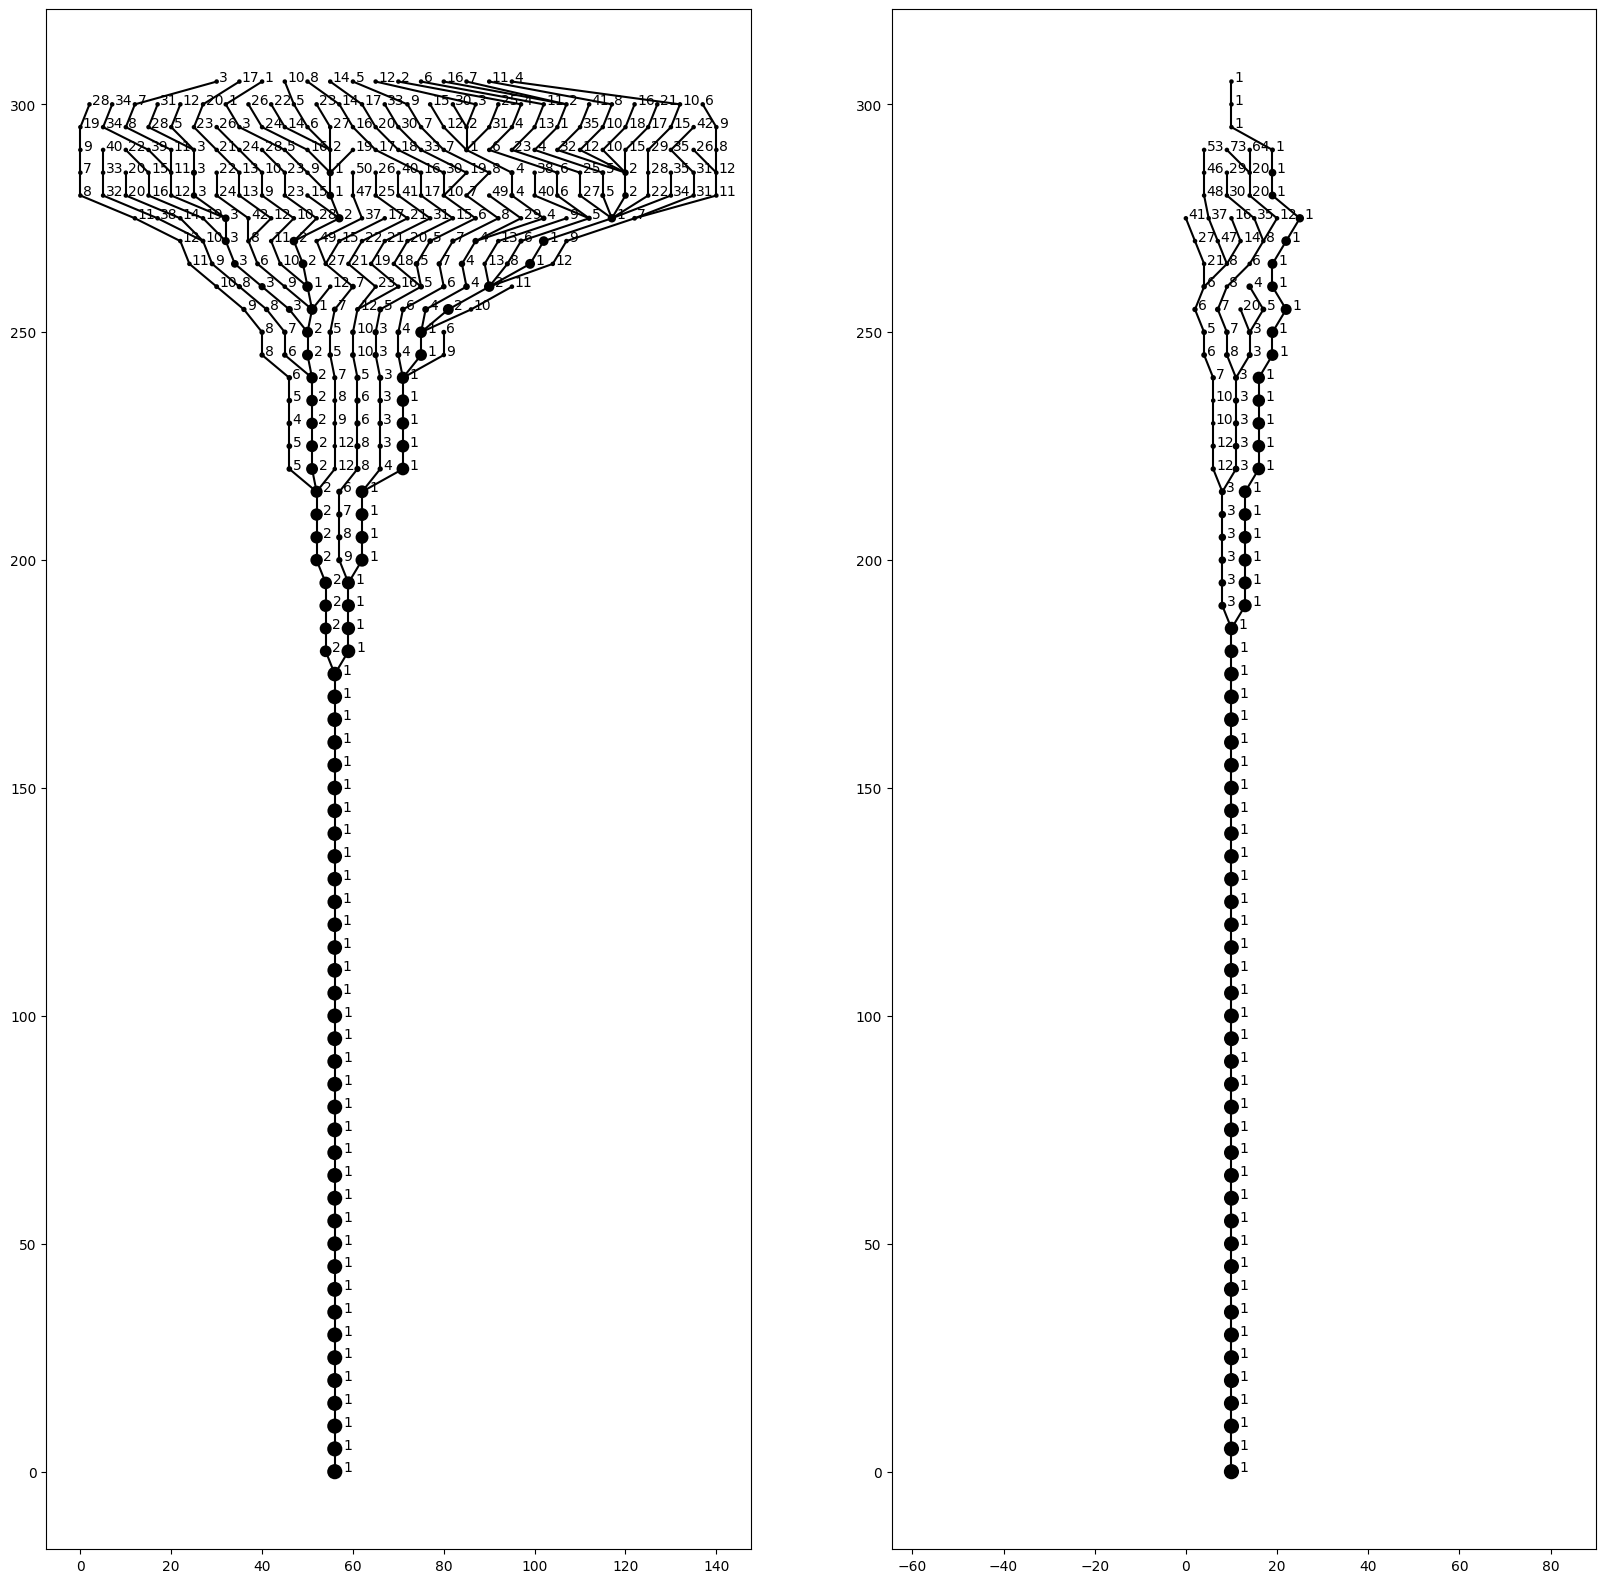

In [50]:
r618sidm = tangos.get_simulation('r492.romulus25si2s50v35')
print(r618sidm)
#print earliest timestep
print(r618sidm.timesteps[0])
print(len(r618sidm.timesteps))
timestep = r618sidm.timesteps[-1]
print(timestep)
print(timestep.halos[0])

fig, ax = plt.subplots(1,2,figsize=(20,20))

#set current axis to the first subplot
plt.sca(ax[0])


halo = timestep.halos[0]
tree = tangos.relation_finding.tree.MergerTree(halo)
tree.construct()
tree.plot()

r618 = tangos.get_simulation('r492.romulus25.3072g1HsbBH')
print(r618)
#print earliest timestep
print(r618.timesteps[0])
print(len(r618.timesteps))

timestep = r618.timesteps[-1]
print(timestep)
print(timestep.halos[0])

#set current axis to the second subplot
plt.sca(ax[1])
halo = timestep.halos[0]
tree = tangos.relation_finding.tree.MergerTree(halo)
tree.construct()
tree.plot()
    

In [16]:
r431 = tangos.get_simulation('r431.romulus25cvdXsec.3072g1HsbBH')
print(r432)

<Simulation("r431.romulus25cvdXsec.3072g1HsbBH")>


In [19]:
halo = r431.timesteps[-1].halos[0]
print(halo)

<Halo 'r431.romulus25cvdXsec.3072g1HsbBH/r431.romulus25cvdXsec.3072g1HsbBH.004096/halo_1' | NDM=5077003 Nstar=3436861 Ngas=3225138>


In [2]:
sims_folder = '/home/bk639/data/MerianSIDM/'
import traceback
simdict = {}
for sim in sims:
    try:
        simpath = sims_folder + sim.basename
        print(simpath)
        fuzzy_match_catalogs,snaps = get_fuzzy_match_catalogs_for_halo(simpath, sim)
        simdict[sim.basename] = [fuzzy_match_catalogs,snaps]
    except:
        print("Error with sim", sim.basename)
        print(traceback.format_exc())
    



/home/bk639/data/MerianSIDM/r431.romulus25.3072g1HsbBH
Error with sim r431.romulus25.3072g1HsbBH
Traceback (most recent call last):
  File "/tmp/ipykernel_2383227/493732582.py", line 8, in <module>
    fuzzy_match_catalogs,snaps = get_fuzzy_match_catalogs_for_halo(simpath, sim)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'get_fuzzy_match_catalogs_for_halo' is not defined

/home/bk639/data/MerianSIDM/r431.romulus25cvdXsec.3072g1HsbBH
Error with sim r431.romulus25cvdXsec.3072g1HsbBH
Traceback (most recent call last):
  File "/tmp/ipykernel_2383227/493732582.py", line 8, in <module>
    fuzzy_match_catalogs,snaps = get_fuzzy_match_catalogs_for_halo(simpath, sim)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'get_fuzzy_match_catalogs_for_halo' is not defined

/home/bk639/data/MerianSIDM/r468.romulus25.3072g1HsbBH
Error with sim r468.romulus25.3072g1HsbBH
Traceback (most recent call last):
  File "/tmp/ipykernel_238

In [17]:
import pickle
with open('merger_.pickle', 'wb') as f:
    pickle.dump(simdict, f)
print(simdict['r615.romulus25.3072g1HsbBH'])

KeyError: 'r615.romulus25.3072g1HsbBH'

In [48]:
for sims in simdict:
    print(sims)
    for j in range(len(fuzzy_match_catalogs)):
        #print("Snapshot", snaps[j])
        cat = fuzzy_match_catalogs[j]
        for i in range(0,len(cat)):
            #if len(cat[i]) > 0:
                #if cat[i][0]>1:
                    print(cat[i])
                    #print(len(cat[i][0]))


r431.romulus25.3072g1HsbBH
[]
[(1, 0.9985320429095844)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(1, 0.999622049042014)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(25, 0.9969302355640288)]
[]
[]
r488.romulus25.3072g1HsbBH
[]
[(1, 0.9985320429095844)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(1, 0.999622049042014)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(25, 0.9969302355640288)]
[]
[]
r492.romulus25.3072g1HsbBH
[]
[(1, 0.9985320429095844)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(1, 0.999622049042014)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(25, 0.9969302355640288)]
[]
[]
r502.romulus25.3072g1HsbBH
[]
[(1, 0.9985320429095844)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[(1, 0.9

In [ ]:
#get timesteps

sim = tangos.get_simulation("r431.romulus25.3072g1HsbBH")

In [ ]:
print(sim.basename)

In [ ]:
z0_filepath = simpath + sim.timesteps[-1].extension
print(z0_filepath)
#get the last digit of the extension using split and .
sim.timesteps[-1].extension.split('.')[-1]

In [ ]:
#use pynbody to create a bridge bewteen the last 2 timessteps



In [ ]:

#get number of particles from each snapshot
print(len(z0), len(z_prev))

#there are more particles in the most recent snapshot, we need to get rid of them
z0_new = z0[:len(z_prev)].load_copy()

print(len(z0_new), len(z_prev))
print(len(z0)-len(z_prev))




In [ ]:
h_prev = z_prev.halos()
b = z_prev.bridge(z0)


In [ ]:
progenitor_particles = b(h_prev[1])

In [ ]:
cat = b.match_catalog()
print(cat)

In [ ]:
cat = b.fuzzy_match_catalog()
print(cat)

In [ ]:
for i in range(0,len(cat)):
    if len(cat[i]) > 0:
        print(cat[i])

In [51]:
import pynbody

def get_fuzzy_match_catalogs_for_halo(simpath, sim):
    fuzzy_match_catalogs = []
    bridges = []


    #load most recent timesteps
    #create bridges
    #get fuzzy match catalog
    #snapold and snapold are backwards, snapold is the youngest snapshot
    for i in range(1, 4):
        try:
            filepath = simpath +'/'+ sim.timesteps[-i].extension
        except:
            print("Error with sim", sim.basename)
            print(traceback.format_exc())
            return
        snapnew = pynbody.load(filepath)
        timestepnew = sim.timesteps[-i].extension.split('.')[-1]
        if i !=1:
            halo = snapold.halos()[1]
            bridge = pynbody.bridge.OrderBridge(snapold, snapnew)
            cat = bridge.fuzzy_match_catalog()
            fuzzy_match_catalogs.append(cat)
            bridges.append([timestepold, timestepnew])   
        snapold = snapnew
        timestepold = timestepnew


    return fuzzy_match_catalogs, bridges

In [ ]:
fuzzy_match_catalogs,snaps = get_fuzzy_match_catalogs_for_halo(simpath, sim)

In [ ]:
for j in range(len(fuzzy_match_catalogs)):
    print("Snapshot", snaps[j])
    cat = fuzzy_match_catalogs[j]
    for i in range(0,len(cat)):
        if len(cat[i]) > 0:
            print(cat[i])

In [ ]:
sim.timesteps[-4].extension